In [95]:
# carga de dataframes
import pandas as pd
import numpy as np

# ploteo
import matplotlib.pyplot as plt

# guardar modelo
import joblib

#grafico
import scipy.stats as stats

# construcción
from sklearn.linear_model._huber import HuberRegressor
from sklearn.ensemble._forest import ExtraTreesRegressor
from sklearn.linear_model._bayes import BayesianRidge
from sklearn.ensemble._forest import RandomForestRegressor


# evaluación
from sklearn.metrics import mean_squared_error, r2_score

## Carga Archivos

In [85]:
X_train = pd.read_csv('output/xtrain.csv')
X_test = pd.read_csv('output/xtest.csv')
Y_train = pd.read_csv('output/ytrain.csv')
Y_test = pd.read_csv('output/ytest.csv')
features = pd.read_csv('output/selected_features.csv')

In [86]:
X_train=X_train[features['0'].values]
X_test=X_test[features['0'].values]

## Modelos

### Random Forest Regressor

In [59]:
Rdm_frst=RandomForestRegressor(n_estimators=100,random_state=123)
Rdm_frst.fit(X_train,y=Y_train)

c:\Users\56953\Proyectos Python\Datapath ML\Modulo 2\Proyecto Final\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=123)

Se genera random forest con 100 estimadores, ya que es un número de arboles común en distintos procesos, para no sobre o sub ajustar el modelo.

In [60]:
pred = Rdm_frst.predict(X_test)


In [61]:
print('train r2: {}'.format(
    r2_score(Y_test, pred)))

train r2: 0.7922832022856023


### Huber Regressor

In [62]:
HbrRgrssr=HuberRegressor(epsilon=5, max_iter=100, alpha=0.01)#epsilon soporte mejor los outliars, alpha el penalizador de ridge
HbrRgrssr.fit(X_train,y=Y_train)

c:\Users\56953\Proyectos Python\Datapath ML\Modulo 2\Proyecto Final\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor(alpha=0.01, epsilon=5)

In [63]:
pred = HbrRgrssr.predict(X_test)

In [64]:
print('train r2: {}'.format(
    r2_score(Y_test, pred)))

train r2: 0.5568916478651658


### Bayesian Ridge

In [65]:
ByssnRdg=BayesianRidge()
ByssnRdg.fit(X_train,y=Y_train)

c:\Users\56953\Proyectos Python\Datapath ML\Modulo 2\Proyecto Final\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [66]:
pred = HbrRgrssr.predict(X_test)

In [67]:
print('train r2: {}'.format(
    r2_score(Y_test, pred)))

train r2: 0.5568916478651658


### Extra Trees Regressor

In [74]:
EtrsRgsr=ExtraTreesRegressor(n_estimators=100, random_state=123)
EtrsRgsr.fit(X_train,y=Y_train)

c:\Users\56953\Proyectos Python\Datapath ML\Modulo 2\Proyecto Final\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor(random_state=123)

In [75]:
pred = EtrsRgsr.predict(X_test)

In [76]:
print('train r2: {}'.format(
    r2_score(Y_test, pred)))

train r2: 0.7450582469940723


Se puede ver que al evaluar los distintos modelos los mejores estan relacionados al uso masivo de arboles de decisión, siendo el mejor de estos el Random Forest, por tanto este se realizara un analisis un poco máss exhaustivo con este modelo y se exportará 

## Analisis de RandomForest

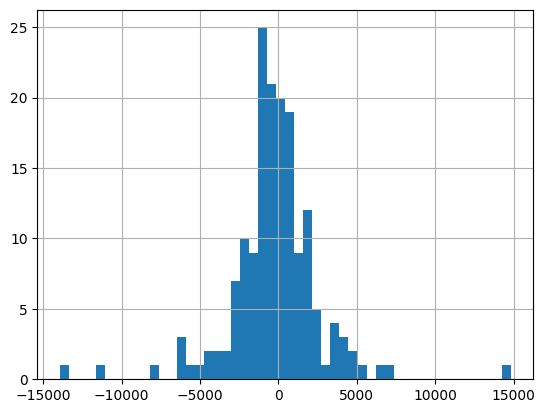

In [93]:
errors = Y_test['price'] - Rdm_frst.predict(X_test)
errors.hist(bins=50)
plt.show()

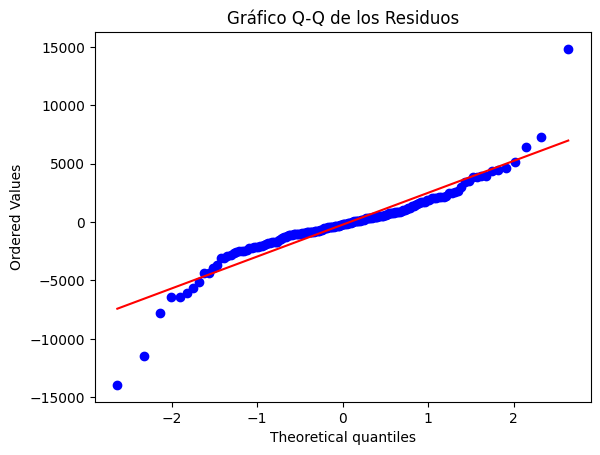

In [96]:
stats.probplot(errors, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')#Residuos de distribución normal
plt.show()

Se puede ver algo similar a la gaussina, entonces quiere decir que los errores rondan al 0, lo que quiere decir que hay menos error 

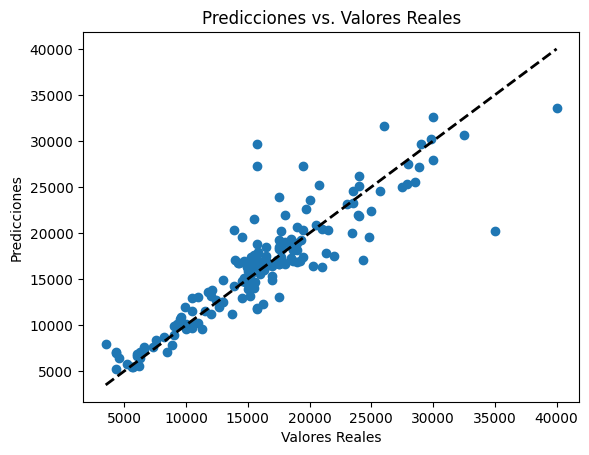

In [94]:

plt.scatter(Y_test, Rdm_frst.predict(X_test))
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valor de auto real')
plt.ylabel('valor predicho del auto')
plt.title('Evaluación Random Forest')
plt.show()

Se puede ver que hay una colinealidad en los valores, lo que quiere decir que los valores reales y los que se predicen siguen un comportamiento similar. Cuando los valores son más altos comienza a haber error, esto se debe a que la muestra no posee tantos valores grandes

In [92]:
joblib.dump(Rdm_frst, 'output/random_forest.joblib') 

['output/random_forest.joblib']